In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns


In [15]:
df=pd.read_csv('/SMS_Spam_Project/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#NOTE -Data Cleaning 
1. Checking for null cloumns and Drop the null columns
2.Renaming the cloumns
3.#NOTE -  Chage the labels column values 
4. checking the missing values  if and then drop the missing values
5.check the duplicate values if and then reomve 


In [16]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
#NOTE -  Renameing the columns
df.rename(columns={'v1':'label','v2':'Message'},inplace=True)

In [18]:
#NOTE -  Chage the labels column values 
l=[]
for i in df['label'].values:
    if i=='ham':
        l.append('0')
        
    else:
        l.append('1')  
        
        
df['label']=l

df.head(10)


,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [19]:
df.duplicated().sum()
df['label']=df['label'].astype(str)


In [20]:
#NOTE -  drop the duplicate values 
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()
df


,label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ï¿½_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#NOTE -  ======================EDA ======================================================================
1.check the hom much spam data  in the sheet
2.check the hom much ham data  in the sheet

In [22]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

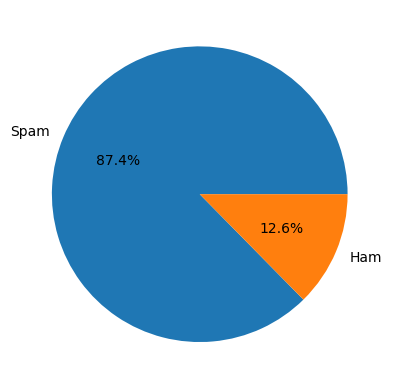

In [23]:
#NOTE -  check the values in the part
plt.pie(df['label'].value_counts(),labels=['Spam','Ham'],autopct='%1.1f%%')
plt.show()

In [24]:
#NOTE -  Make a new columns name
df['num_characters']=df['Message'].apply(len) 

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nitin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#NOTE -  New cloumn name number of words 
import nltk
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

df

,label,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162,35
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [27]:
#NOTE -  New cloumn name number of words 
import nltk
df['num_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

df

,label,Message,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162,35,4
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


array([[<AxesSubplot: title={'center': 'num_characters'}>,
        <AxesSubplot: title={'center': 'num_words'}>],
       [<AxesSubplot: title={'center': 'num_sent'}>, <AxesSubplot: >]],
      dtype=object)

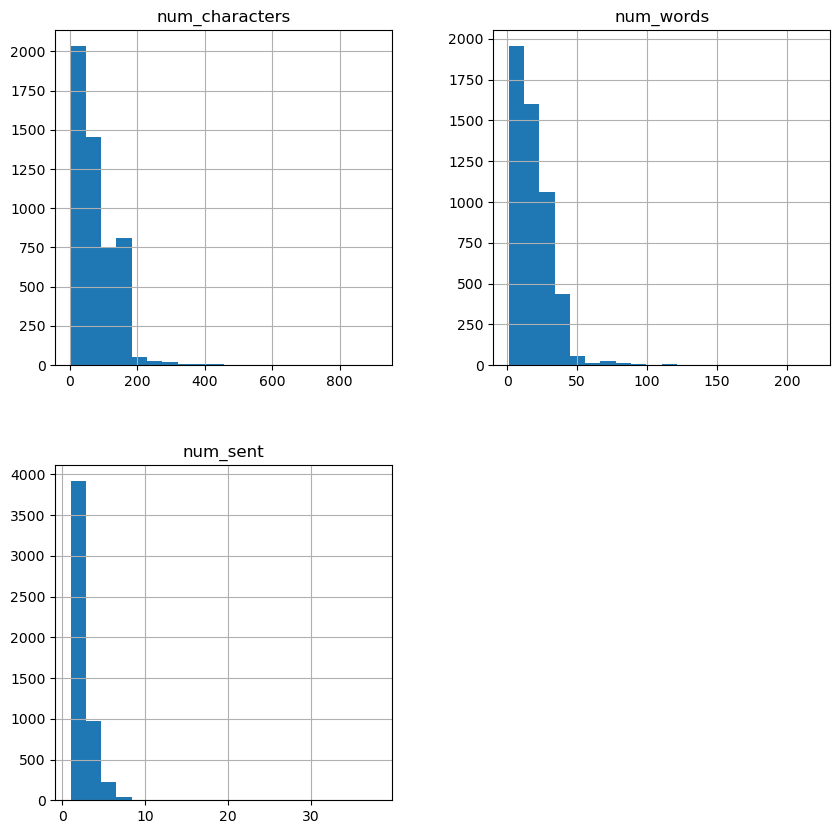

In [29]:
df.hist(bins=20,figsize=(10,10))

# NOTE -  Data preprocessing

1.Lower the case
2.Tokenization
3.Remove Special Characters
4.Remove Stop Words
5.Stemming(second,third from convert into first from the word)



In [30]:
from nltk.corpus import stopwords
stopwords.words('english')
# nltk.download('stopwords')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transfrom_Text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    #NOTE - =================
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)



'hello nitin kumar 0 kg'

In [32]:
#NOTE -  add the transfrom text into column 
df['Transfrom_Text']=df['Message'].apply(lambda x:transfrom_Text(x))

df.head()

,label,Message,num_characters,num_words,num_sent,Transfrom_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
#NOTE -  genrate the world cloud 
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')


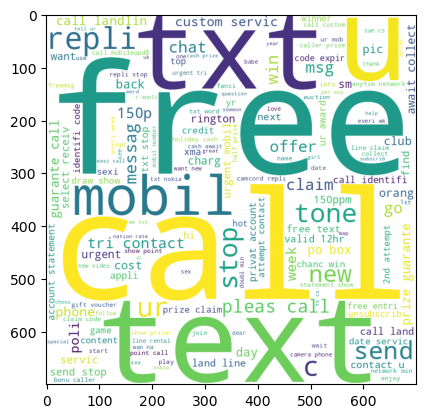

In [34]:
spam_ms=wc.generate(df[df['label']=='1']['Transfrom_Text'].str.cat(sep=" "))
plt.imshow(spam_ms)

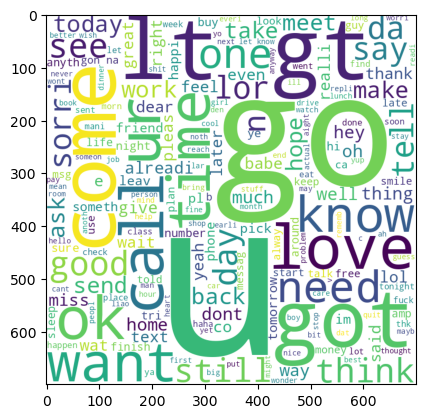

In [35]:
ham_ms=wc.generate(df[df['label']=='0']['Transfrom_Text'].str.cat(sep=" "))
plt.imshow(ham_ms)

<AxesSubplot: xlabel='0', ylabel='1'>

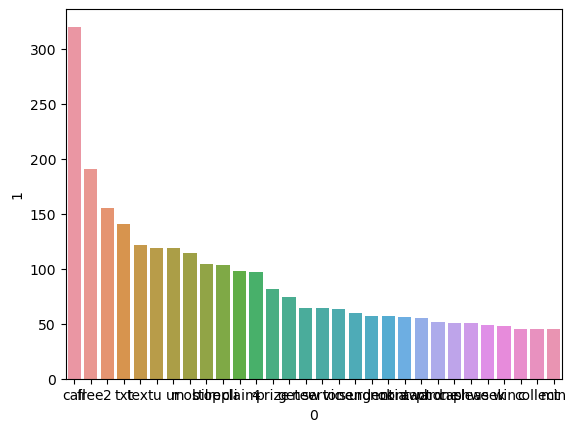

In [36]:
from collections import Counter
spam_ls=[]
for i in df[df['label']=='1']['Transfrom_Text'].to_list():
    for j in i.split():
        spam_ls.append(j)
spam_count=Counter(spam_ls).most_common(30)
df_spam_count=pd.DataFrame(spam_count)
sns.barplot(x=df_spam_count[0],y=df_spam_count[1])

    


# NOTE -  Model Building
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(df['Transfrom_Text']).toarray()
x.shape


(5169, 3000)

In [38]:
y=df['label'].values
y

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()


In [42]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test.astype(int),y_pred1.astype(int)))


0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [43]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
accuracy_score(y_test,y_pred2)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test.astype(int),y_pred2.astype(int)))


0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [44]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test.astype(int),y_pred3.astype(int)))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# tfidf ->MNB 

In [45]:
import pickle
pickle.dump(tfidf,open('/home/nitin/Documents/tfidf.pickle','wb'))
pickle.dump(mnb,open('/home/nitin/Documents/model.pickle','wb'))